In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [4]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

### 1. Подберите скорость обучения (alpha) и количество итераций:

Для подбора скорости обучения воспользуемся следующей логикой: попробуем  перебрать несколько значений alpha от большего к меньшему, и возьмем наибольшее из тех, при котором метод будет сходиться. Количество итераций при этом ограничим.

In [5]:
n = X.shape[1]
#alpha = 1e-4
W = np.array([1, 0.5])

In [6]:
alpha = (np.arange(0, 1.1, 0.1)**3)[1:]
alpha

array([0.001, 0.008, 0.027, 0.064, 0.125, 0.216, 0.343, 0.512, 0.729,
       1.   ])

In [7]:
for k_ in alpha:
    print(f'Скорость обучения {k_}')
    W = np.array([1, 0.5])
    for i in range(101):
      y_pred = np.dot(W, X)
      err = calc_mse(y, y_pred)
      for ii in range(W.shape[0]):
        W[ii] -= k_ * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
      if i % 20 == 0:
        print(i, W, err)
    print('------------------------------------------------------------------')

Скорость обучения 0.0010000000000000002
0 [1.1102 0.84  ] 3173.15
20 [2.96498603 5.80455867] 1660.357367020027
40 [4.36705894 8.42208511] 1187.5939302355498
60 [5.51559077 9.76902705] 1021.5103081244217
80 [ 6.51870117 10.42878889] 946.6271582037792
100 [ 7.43515582 10.71754582] 899.5990444359252
------------------------------------------------------------------
Скорость обучения 0.008000000000000002
0 [1.8816 3.22  ] 3173.15
20 [10.22207724 10.70868337] 794.5136248852729
40 [15.92158564  9.69230345] 581.8694764494738
60 [20.73878957  8.80291406] 429.647088391008
80 [24.81483685  8.05024132] 320.660888114296
100 [28.26377728  7.41336809] 242.63036945232983
------------------------------------------------------------------
Скорость обучения 0.027000000000000014
0 [3.9754 9.68  ] 3173.15
20 [22.98158608  8.38876511] 380.63350601591
40 [33.51116301  6.44439818] 153.0838434110827
60 [39.46880407  5.34427418] 80.23829445232431
80 [42.83964103  4.72182335] 56.91822470421719
100 [44.74686264 

Мы видим, что при alpha > 0.125 ошибка начинает расти. Значит в качестве скорости обучения выберем 0.064. <br>
Теперь подберем количество итераций при заданном alpha

In [8]:
alpha = 0.064
W = np.array([1, 0.5])

In [9]:
errors = []
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  errors.append(err)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  if i % 100 == 0:
    print(i, W, err)


0 [ 8.0528 22.26  ] 3173.15
100 [47.1915266   3.92626907] 45.93968451663295
200 [47.23210094  3.91072786] 45.937500001713154
300 [47.23214281  3.9107143 ] 45.93749999999997
400 [47.23214286  3.91071429] 45.93750000000002
500 [47.23214286  3.91071429] 45.937500000000014
600 [47.23214286  3.91071429] 45.9375
700 [47.23214286  3.91071429] 45.9375
800 [47.23214286  3.91071429] 45.9375
900 [47.23214286  3.91071429] 45.9375


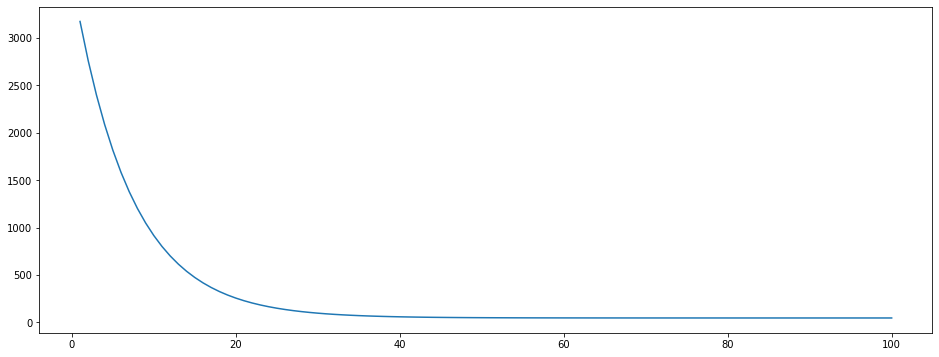

In [10]:
# кусок графика зависимости снижения MSE от количества итераций.
plt.figure(figsize=(16, 6))
plt.plot(np.arange(1,101), errors[:100])

по графику мы видим, что при заданной скорости обучения оптимальным количеством итераций будет ~40

In [11]:
# посчитаем так же оптимальное число итераций по условию, что разница в MSE между соседними 
# итерациями не превышает некую переменную eps
eps = 0.01 # желаемое предельное снижение ошибки за итерацию
for i in range(len(errors)):
    if errors[i-1] - errors[i] < eps and i > 0:
        print(f'оптимальное число итераций - {i}')
        break

оптимальное число итераций - 76


Таким образом мы получили alpha = 0.064 и количество итераций ~55

#### *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [12]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])

In [13]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  #W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y)))) # по этой формуле вы отнимаем одно и то же число из разных весов
  W -= (alpha * 2/n * np.dot(X, (np.dot(X.T, W) - y))) # а это по формуле вычисления градиента
  if i % 100 == 0:
    print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889413
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


####  *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).


Здесь мы по сути просто объединим то,что уже сделали ранее.

In [22]:
n = X.shape[1]
alpha = 0.064
W = np.array([1, 0.5])
eps = 0.001 # желаемая точность, сделаем чуть выше чем в задании 2
err = np.inf # базовая ошибка для нулевой итерации
i = 0 # счетчик для самоконтроля

In [23]:
while True:
    y_pred = np.dot(W, X)
    if err - calc_mse(y, y_pred) < eps:
        break
    err = calc_mse(y, y_pred)
    W -= (alpha * 2/n * np.dot(X, (np.dot(X.T, W) - y))) # а это по формуле вычисления градиента
    i += 1
print(W, err, i)

[47.16175014  3.93807553] 45.94426042942315 93
